In [31]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#check for skewness        
def check_skew(image_gray,image):
    thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
 
    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)        
    # otherwise, just take the inverse of the angle to make it positive
    else:
        angle = -angle

    # rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [3]:
#Get the Edges of the skewed image by applying closing morphology and canny edge detection
def canny_edge(skewed_image):
    kernel = np.ones((3,3),np.uint8)
    closing = cv2.morphologyEx(skewed_image, cv2.MORPH_CLOSE, kernel)
    edges = cv2.Canny(closing, 100, 200)
    return edges

In [4]:
#Draw contours for the detected edges to original image
def get_contours(edged_image,image):
    _ret, contours, hierarchy = cv2.findContours(edged_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    image_countours=cv2.drawContours(image,contours , -1, (255,0,0), 1)
    return image_countours

In [5]:
#Save the contours image in the specified output folder
def save_output(contour_image, output_path, filename):
    cv2.imwrite(output_path+filename, contour_image)
    
    

In [36]:
#Get the path and perform removal of noise and converting the image into graysscale
def read(input_path,output_path):
    plt.title('Input Images')
    for filename in os.listdir(input_path):
        file_path=(os.path.join(input_path, filename))
        image = cv2.imread(file_path)
        plt.imshow(image)
        plt.show()
        image_denoise = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        image_gray = cv2.cvtColor(image_denoise, cv2.COLOR_BGR2GRAY)
        image_gray = cv2.bitwise_not(image_gray)
        image=check_skew(image_gray, image)
        edged_image=canny_edge(image)
        contour_image=get_contours(edged_image, image)
        save_output(contour_image, output_path, filename)

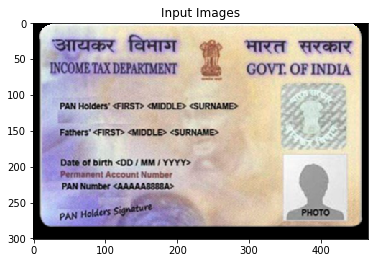

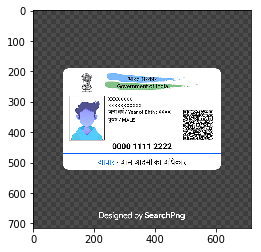

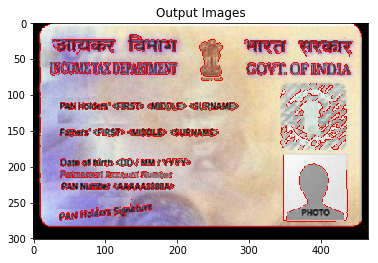

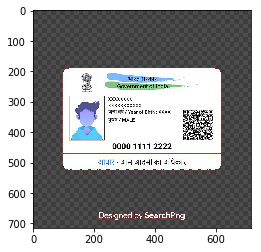

In [37]:
input_path="E:/ML_Hands/input/"
output_path="E:/ML_Hands/output/"
read(input_path, output_path)
plt.title('Output Images')
for filename in os.listdir(output_path):
    file_path=(os.path.join(output_path, filename))
    image = cv2.imread(file_path)
    plt.imshow(image)
    plt.show()

